In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [22]:
df=pd.read_csv("adult (1).csv")
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [23]:
df.dtypes

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object

In [24]:
df.isnull().sum()

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [26]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [27]:
df.shape

(32560, 15)

In [28]:
df.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [29]:
categorical_columns= df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

[' State-gov', ' Bachelors', ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' United-States', ' <=50K']


In [30]:
label_encoders={ }

for col in categorical_columns:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    label_encoders[col]=le

In [12]:
numerical_columns=df.select_dtypes(include=['int64']).columns.tolist()

In [33]:
X=df.drop(columns=[' <=50K'])
y=df[' <=50K']


In [35]:
X

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [36]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name:  <=50K, Length: 32560, dtype: int32

In [40]:
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [41]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [43]:
X_train

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
41431,-0.474536,6,-0.735566,14,1.912181,2,10,0,4,1,-0.145914,-0.216663,2.795498,39
16109,-1.508870,4,0.033238,15,-0.031325,4,8,3,4,1,-0.145914,4.054233,-1.655200,39
40443,0.430959,4,-0.450635,11,-0.420027,2,1,5,4,0,-0.145914,-0.216663,-0.035430,39
26927,2.083392,0,-0.546905,11,-0.420027,2,0,0,2,1,-0.145914,-0.216663,-1.655200,39
43966,-0.596435,4,0.306266,15,-0.031325,2,12,0,4,1,-0.145914,-0.216663,-0.035430,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.470540,4,0.376456,11,-0.420027,3,3,1,4,1,-0.145914,-0.216663,2.556203,26
44732,0.602304,0,-0.010417,11,-0.420027,2,0,5,4,0,-0.145914,-0.216663,-0.035430,39
38158,-0.351563,3,-0.250383,9,1.134779,2,1,0,4,1,-0.145914,4.468292,0.880571,39
860,0.323917,4,0.016724,11,-0.420027,2,5,0,4,1,-0.145914,-0.216663,-0.035430,26


In [44]:
y_train

41431    1
16109    0
40443    1
26927    0
43966    1
        ..
11284    0
44732    1
38158    1
860      0
15795    0
Name:  <=50K, Length: 39550, dtype: int32

In [45]:
nb_model = GaussianNB(priors=[0.6, 0.4]) 
nb_model.fit(X_train, y_train)

GaussianNB(priors=[0.6, 0.4])

In [46]:
y_pred = nb_model.predict(X_test)

In [47]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [48]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [49]:
cm = confusion_matrix(y_test, y_pred)

In [50]:
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.6930
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.94      0.75      4943
           1       0.88      0.45      0.59      4945

    accuracy                           0.69      9888
   macro avg       0.75      0.69      0.67      9888
weighted avg       0.75      0.69      0.67      9888



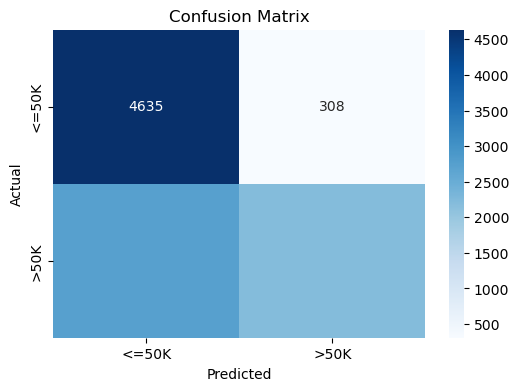

In [51]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()